In this second part, we will create and train a MultiLayer Perceptron (MLP) and a Convolutional Neural Network (CNN) on the benchmark dataset MNIST.

In [36]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

import numpy as np

from matplotlib import pyplot as plt

Since it's a common dataset, MNIST can be found in the datasets module of keras (actually, it's only on tensorflow in some versions, so try to remove the `tf` part in the string below and see if it works for you)...

In [12]:
(mnist_train_images, mnist_train_labels), (mnist_validation_images, mnist_validation_labels) = tf.keras.datasets.mnist.load_data()
mnist_train_images.shape, mnist_train_labels.shape, mnist_validation_images.shape, mnist_validation_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Question**: what does this variable assignment mean?

```python
(mnist_train_images, mnist_train_labels), (mnist_validation_images, mnist_validation_labels) = ...
```

Let's proceed with querying the dataset first...

We use matplotlib for plotting the image here for two reasons:

1. We can add a title to the data (e.g., by adding the label)
2. PIL shows images on a 1:1 scale, thus a 28 x 28 image is too small to be seen well on a modern monitor. Matplotlib, instead, plots the images so that they are always at a "visible" scale

Text(0.5, 1.0, 'Label: 5')

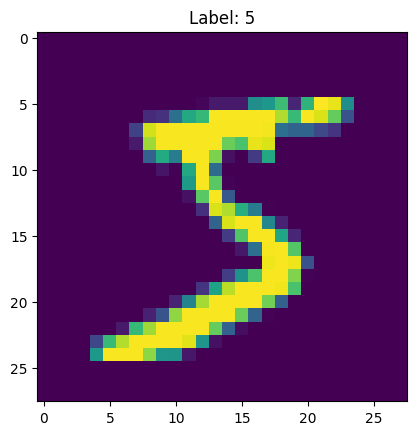

In [19]:
mnist_first_image = mnist_train_images[0]
mnist_first_label = mnist_train_labels[0]

plt.imshow(mnist_first_image)
plt.title(f'Label: {mnist_first_label}')

When plotting grayscale images (as it is the case with mnist), we should use the "gray" colormap for matplotlib, to avoid getting the weird purple-to-yellow color representation, which is not a faithful representation of the image.

Text(0.5, 1.0, 'Label: 5')

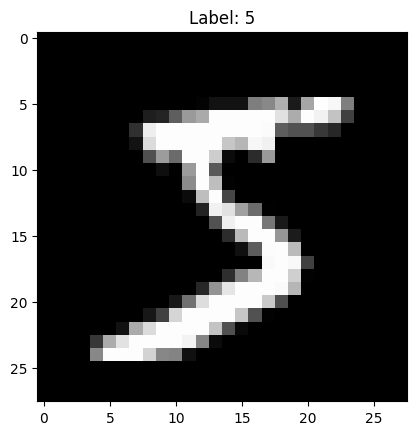

In [20]:
plt.imshow(mnist_first_image, cmap="gray")
plt.title(f'Label: {mnist_first_label}')

We have to normalize the data. **DIY**

In [ ]:
# normalize data

# your code here

We can finally construct the neural network. We can use the `Sequential` paradigm, which works by stacking up layers.

**Notice that `Sequential` only works when the information flows sequentially through a NN. If there is branching, we need to use other paradigms**

In [ ]:
mlp = Sequential()

mlp.add(keras.layers.Flatten(input_shape=(28, 28)))
mlp.add(Dense(32, activation='relu', input_shape=(784,)))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(10, activation='softmax'))

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


2025-03-19 01:16:28.024008: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Before training, we need to **compile** the model, by specifying an optimizer and loss function. Optionally, we can also list evaluation metrics to monitor them during training.

In [ ]:
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp.fit(mnist_train_images, mnist_train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3505 - accuracy: 0.8992
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1670 - accuracy: 0.9512
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1312 - accuracy: 0.9611
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1095 - accuracy: 0.9671
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0970 - accuracy: 0.9708


This refers only to the training metrics. To get the validation performance, we call `evaluate`

In [ ]:
mlp.evaluate(mnist_validation_images, mnist_validation_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.1112 - accuracy: 0.9676


[0.11118602007627487, 0.9675999879837036]

**Question**: the method above requires to pass images and labels. At deployment time, however, we might not have labels. What can we do in this case?

Experiment with it...

In [50]:
# your code here

Next, we can build a cnn to train on MNIST. This is the architecture we will reproduce

In [30]:
cnn = Sequential()

cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(keras.layers.GlobalAveragePooling2D())
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_average_pooling2d_1   (None, 64)              

In [31]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(mnist_train_images, mnist_train_labels, epochs=2)
cnn.evaluate(mnist_validation_images, mnist_validation_labels)

Epoch 1/2
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2895 - accuracy: 0.9084
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9814


[0.057979241013526917, 0.9814000129699707]

We can try to experiment with this model by using more 

(28, 28)


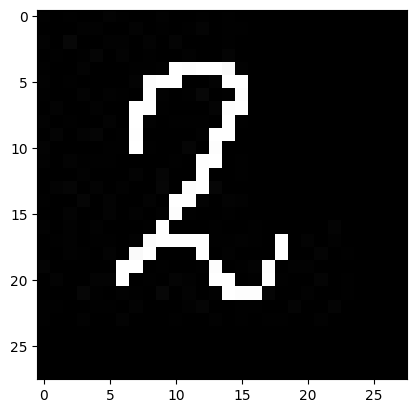

In [42]:
from PIL import Image

testimg = Image.open("mnist/2.jpg")
testimg = testimg.convert("L")

print(testimg.size)
plt.imshow(testimg, cmap="gray")

In [45]:
img_array = np.array(testimg)
img_array.shape

# need to be 1 x 28 x 28 x 1

img_array = img_array.reshape(1, 28, 28, 1)
img_array.shape

(1, 28, 28, 1)

In [48]:
prediction = cnn.predict(img_array)

# DIY: convert to number

1/1 [==============================] - 0s 20ms/step


DIY: implement a residual layer using the functional interface

![](imgs/residual.png)



In [49]:
cnn.save("mnist_cnn.h5")